# Install library pyspark

In [1]:
!pip install pyspark

     |████████████████████████████████| 212.3MB 65kB/s 
     |████████████████████████████████| 204kB 45.5MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=3a63038b0b01ab029280d701a319b4a4b1ea79b3cbcf0dcbbaf176b92460126f
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark


# download data

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip  bank-additional.zip


--2021-03-30 23:31:57--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: ‘bank-additional.zip’

bank-additional.zip 100%[===================>] 434.15K  1.32MB/s    in 0.3s    

2021-03-30 23:31:57 (1.32 MB/s) - ‘bank-additional.zip’ saved [444572/444572]

Archive:  bank-additional.zip
   creating: bank-additional/
  inflating: bank-additional/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/bank-additional/
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MACOSX/

In [3]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

# RDD

## membuat sparkContext

1. sparkcontext = untuk membuat koneksi dengan engine spark
2. sparkconfig = konfigurasi sparkcontext 

In [5]:
conf = SparkConf().setAppName("Python Spark create RDD example").setMaster('local')
sc = SparkContext(conf=conf)

## input_data

secara umum ada 2 metode yang umum dilakukan untuk input data RDD:
1. menggunakan sc.parallelize() (untuk membuat data RDD)
2. menggunakan sc.textFile() (untuk mengambil data dari external)

### parallelize

In [ ]:
#all numeric

df_numeric = sc.parallelize([1,3,4,5,6,7,8])
df_numeric.collect()

[1, 3, 4, 5, 6, 7, 8]

untuk mendapatkan output bisa menggunakan fungsi RDD (df.collect())

In [ ]:
# all text
df_text = sc.parallelize(["scala", 
   "java", 
   "hadoop", 
   "spark", 
   "akka",
   "spark vs hadoop", 
   "pyspark",
   "pyspark and spark"])

df_text.collect()

['scala',
 'java',
 'hadoop',
 'spark',
 'akka',
 'spark vs hadoop',
 'pyspark',
 'pyspark and spark']

In [ ]:
# mix text and numeric

df_text_numeric = sc.parallelize([1, 2, 3, 'a b c'])
df_text_numeric.collect()

[1, 2, 3, 'a b c']

### text file

untuk data bisa didownload melalui link [ini](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

In [6]:
df_bank = sc.textFile('bank-additional/bank-additional-full.csv')
df_bank.collect()

['"age";"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"',
 '56;"housemaid";"married";"basic.4y";"no";"no";"no";"telephone";"may";"mon";261;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"',
 '57;"services";"married";"high.school";"unknown";"no";"no";"telephone";"may";"mon";149;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"',
 '37;"services";"married";"high.school";"no";"yes";"no";"telephone";"may";"mon";226;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"',
 '40;"admin.";"married";"basic.6y";"no";"no";"no";"telephone";"may";"mon";151;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"',
 '56;"services";"married";"high.school";"no";"no";"yes";"telephone";"may";"mon";307;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"',
 '45;"services";"married";"basic.9y";"unknown";"no";"no";"telephone";"may

## Schema

RDD are less schema

In [ ]:
data_heterogenous = sc.parallelize([('Ferrari', 'fast'), {'Porsche': 100000}, ['Spain','visited', 4504]])

data_heterogenous.collect()

[('Ferrari', 'fast'), {'Porsche': 100000}, ['Spain', 'visited', 4504]]

## Reading from files

### take(n)

fungsi take() digunakan untuk melihat beberapa row dalam  data, misal take(5) akan mengambil lima data teratas dari file

In [ ]:
df_bank.take(5)

['"age";"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"',
 '56;"housemaid";"married";"basic.4y";"no";"no";"no";"telephone";"may";"mon";261;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"',
 '57;"services";"married";"high.school";"unknown";"no";"no";"telephone";"may";"mon";149;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"',
 '37;"services";"married";"high.school";"no";"yes";"no";"telephone";"may";"mon";226;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"',
 '40;"admin.";"married";"basic.6y";"no";"no";"no";"telephone";"may";"mon";151;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"']

### type

untuk mengivestigasi tipe data RDD kita bisa menggunakan fungsi type

In [ ]:
type(df_bank)

pyspark.rdd.RDD

## Transformation

### lambda

In [ ]:
example_df = sc.parallelize([1,2,3,4,5,6])
df_map = example_df.map(lambda x: x * x)
df_map.collect()

[1, 4, 9, 16, 25, 36]

### map

In [ ]:
header = df_bank.first()
df_bank = df_bank.filter(lambda line: line != header)

In [ ]:
df_bank2= df_bank.map(lambda row: row.split(';'))
df_bank2.take(2)

[['56',
  '"housemaid"',
  '"married"',
  '"basic.4y"',
  '"no"',
  '"no"',
  '"no"',
  '"telephone"',
  '"may"',
  '"mon"',
  '261',
  '1',
  '999',
  '0',
  '"nonexistent"',
  '1.1',
  '93.994',
  '-36.4',
  '4.857',
  '5191',
  '"no"'],
 ['57',
  '"services"',
  '"married"',
  '"high.school"',
  '"unknown"',
  '"no"',
  '"no"',
  '"telephone"',
  '"may"',
  '"mon"',
  '149',
  '1',
  '999',
  '0',
  '"nonexistent"',
  '1.1',
  '93.994',
  '-36.4',
  '4.857',
  '5191',
  '"no"']]

In [ ]:
df_age = df_bank2.map(lambda row: row[0])
df_age.take(5)

['56', '57', '37', '40', '56']

You can combine more columns.

In [ ]:
df_profile_cust = df_bank2.map(lambda row: (int(row[0]),row[1],row[2],row[3]))
df_profile_cust.take(5)

[(56, '"housemaid"', '"married"', '"basic.4y"'),
 (57, '"services"', '"married"', '"high.school"'),
 (37, '"services"', '"married"', '"high.school"'),
 (40, '"admin."', '"married"', '"basic.6y"'),
 (56, '"services"', '"married"', '"high.school"')]

### filter

In [ ]:
df_admin = df_profile_cust.filter(lambda row: row[1] == '"admin."')
df_admin.take(5)

[(40, '"admin."', '"married"', '"basic.6y"'),
 (59, '"admin."', '"married"', '"professional.course"'),
 (37, '"admin."', '"married"', '"high.school"'),
 (46, '"admin."', '"married"', '"unknown"'),
 (41, '"admin."', '"married"', '"university.degree"')]

In [ ]:
df_admin.count()

10422

### flatmap

In [ ]:
example_df2 = sc.parallelize(["good morning", "good ebening"])
df_flatmap = example_df2.flatMap(lambda x: x.split(" "))
df_flatmap.collect()

['good', 'morning', 'good', 'ebening']

In [ ]:
example_df2 = sc.parallelize(["good morning", "good ebening"])
df_flatmap = example_df2.map(lambda x: x.split(" "))
df_flatmap.collect()

[['good', 'morning'], ['good', 'ebening']]

### distinct

In [ ]:
df_job = df_bank2.map(lambda row: row[1]) 

In [ ]:
df_job.distinct().collect()

['"housemaid"',
 '"services"',
 '"admin."',
 '"blue-collar"',
 '"technician"',
 '"retired"',
 '"management"',
 '"unemployed"',
 '"self-employed"',
 '"unknown"',
 '"entrepreneur"',
 '"student"']

### sample

sample(withreplacement, fraction, seed)
1. withreplacement = apakah data sebelumnya diganti dengan sample baru
2. fraction = jumlah data dalam persen
3. seed = randomseed

In [ ]:
samples = df_bank2.sample(False, 0.1, 42)

In [ ]:
print('Original dataset: {0}, sample: {1}'.format(df_bank2.count(), samples.count()))

Original dataset: 41188, sample: 4088


## Actions

1. collect() -> melihat output data
2. take() ->  untuk melihat beberapa row dalam data
3. count() -> melihat jumlah data atau jumlah row


### save as textFile

In [ ]:
#data_key.saveAsTextFile('/Users/drabast/Documents/PySpark_Data/data_key.txt')

# pyspark dataframe

## membuat sparksession

In [7]:
spark = SparkSession \
            .builder \
            .appName("Python Spark create dataframe example") \
            .config("spark.some.config.option", "some-value") \
            .getOrCreate()

## input dataframe

### dari RDD

In [ ]:

cust_data = sc.parallelize([("male","director",23,30000000),
                            ("female","staff",34,3000000),
                            ("male","HR",56,46000000),
                            ("male","musician",20,7500000)])

col_name = ['Gender','Job_name','Age','Monthly_income']

cust_df = spark.createDataFrame(cust_data, schema=col_name)

kita bisa menggunakan show() untuk output berbentuk dataframe. untuk membatasi jumlah row kita bisa memasukkan angka dalam function show, misal show(5)

In [ ]:
cust_df.show()

+------+--------+---+--------------+
|Gender|Job name|Age|Monthly income|
+------+--------+---+--------------+
|  male|director| 23|      30000000|
|female|   staff| 34|       3000000|
|  male|      HR| 56|      46000000|
|  male|musician| 20|       7500000|
+------+--------+---+--------------+



### dari csv

kita bisa menggunakan spark read csv untuk memasukkan data csv
dimana ada beberap tambahan fungsi:

1. header, agar dataframe memiliki header
2. inferschema, agar schema muncul di dataframe

In [8]:
my_data_bank = spark.read.csv('bank-additional/bank-additional-full.csv',sep=';', header=True, inferSchema=True)
my_data_bank.show()

+---+-----------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|        job| marital|          education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp.var.rate|cons.price.idx|cons.conf.idx|euribor3m|nr.employed|  y|
+---+-----------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 56|  housemaid| married|           basic.4y|     no|     no|  no|telephone|  may|        mon|     261|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
| 57|   services| married|        high.school|unknown|     no|  no|telephone|  may|        mon|     149|       1|  999|       0|nonexistent|         1.1|        93.

## Transformations

### select()

In [ ]:
df_age = my_data_bank.select('age')
df_age.show(5)

+---+
|age|
+---+
| 56|
| 57|
| 37|
| 40|
| 56|
+---+
only showing top 5 rows



In [ ]:
df_age_job = my_data_bank.select('age','job')
df_age_job.show(5)

+---+---------+
|age|      job|
+---+---------+
| 56|housemaid|
| 57| services|
| 37| services|
| 40|   admin.|
| 56| services|
+---+---------+
only showing top 5 rows



### filter

In [ ]:
df_age_above_60 = my_data_bank.filter(my_data_bank.age > 60)
df_age_above_60.show(5)

+---+----------+--------+-------------------+-------+-------+-------+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|       job| marital|          education|default|housing|   loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp.var.rate|cons.price.idx|cons.conf.idx|euribor3m|nr.employed|  y|
+---+----------+--------+-------------------+-------+-------+-------+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 61|   retired| married|        high.school|     no|unknown|unknown|telephone|  jun|        wed|      99|       4|  999|       0|nonexistent|         1.4|        94.465|        -41.8|    4.864|     5228.1| no|
| 70|   retired|divorced|           basic.4y|     no|    yes|     no| cellular|  mar|        mon|     187|       3|  999|       0|nonexistent|        -1.8| 

In [ ]:
df_age_above_60_admin = my_data_bank.filter((my_data_bank.age > 60) & (my_data_bank.job == 'admin.'))
df_age_above_60_admin.show(5)

+---+------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|   job| marital|        education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp.var.rate|cons.price.idx|cons.conf.idx|euribor3m|nr.employed|  y|
+---+------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 61|admin.| married|university.degree|     no|    yes|  no| cellular|  mar|        mon|     136|       6|  999|       0|nonexistent|        -1.8|        92.843|        -50.0|    1.811|     5099.1| no|
| 70|admin.|divorced|university.degree|     no|     no|  no| cellular|  mar|        mon|      83|       4|  999|       0|nonexistent|        -1.8|        92.843|        -50.0|     1.56|     50

### filter with select

In [ ]:
df_age_below_18 = my_data_bank.filter(my_data_bank.age < 18).select('age','job','education')
df_age_below_18.show()

+---+-------+---------+
|age|    job|education|
+---+-------+---------+
| 17|student|  unknown|
| 17|student| basic.9y|
| 17|student| basic.9y|
| 17|student| basic.9y|
| 17|student|  unknown|
+---+-------+---------+



### groupby

In [ ]:
education_distribution = my_data_bank.groupby('education').count()
education_distribution.show()

+-------------------+-----+
|          education|count|
+-------------------+-----+
|        high.school| 9515|
|            unknown| 1731|
|           basic.6y| 2292|
|professional.course| 5243|
|  university.degree|12168|
|         illiterate|   18|
|           basic.4y| 4176|
|           basic.9y| 6045|
+-------------------+-----+



In [ ]:
from pyspark.sql import functions as F

In [ ]:
age_mean_per_education = my_data_bank.groupby('education').agg(F.mean(my_data_bank.age))
age_mean_per_education.show()

+-------------------+------------------+
|          education|          avg(age)|
+-------------------+------------------+
|        high.school|37.998213347346294|
|            unknown| 43.48122472559214|
|           basic.6y| 40.44895287958115|
|professional.course| 40.08010680907877|
|  university.degree|38.879191321499015|
|         illiterate|              48.5|
|           basic.4y| 47.59650383141762|
|           basic.9y|  39.0612076095947|
+-------------------+------------------+



### withColumn

pyspark memiliki kemampuan untuk membuat column baru

In [ ]:
cust_df.show()

+------+--------+---+--------------+
|Gender|Job name|Age|Monthly income|
+------+--------+---+--------------+
|  male|director| 23|      30000000|
|female|   staff| 34|       3000000|
|  male|      HR| 56|      46000000|
|  male|musician| 20|       7500000|
+------+--------+---+--------------+



In [ ]:
cust_df = cust_df.withColumn('double_age', cust_df.Age * 2)

cust_df.show()

+------+--------+---+--------------+---------+----------+
|Gender|Job_name|Age|Monthly_income| is young|double_age|
+------+--------+---+--------------+---------+----------+
|  male|director| 23|      30000000|    young|        46|
|female|   staff| 34|       3000000|not young|        68|
|  male|      HR| 56|      46000000|not young|       112|
|  male|musician| 20|       7500000|    young|        40|
+------+--------+---+--------------+---------+----------+



### when

In [ ]:
cust_df = cust_df.withColumn('is young', F.when(cust_df.Age < 25, 'young').
                             otherwise('not young'))

cust_df.show()

+------+--------+---+--------------+---------+
|Gender|Job_name|Age|Monthly_income| is young|
+------+--------+---+--------------+---------+
|  male|director| 23|      30000000|    young|
|female|   staff| 34|       3000000|not young|
|  male|      HR| 56|      46000000|not young|
|  male|musician| 20|       7500000|    young|
+------+--------+---+--------------+---------+



### order by

In [ ]:
order_education = my_data_bank.groupby('education').count().orderBy('count', ascending=False)
order_education.show()

+-------------------+-----+
|          education|count|
+-------------------+-----+
|  university.degree|12168|
|        high.school| 9515|
|           basic.9y| 6045|
|professional.course| 5243|
|           basic.4y| 4176|
|           basic.6y| 2292|
|            unknown| 1731|
|         illiterate|   18|
+-------------------+-----+



In [ ]:
order_education = my_data_bank.groupby('education').count().orderBy('count')
order_education.show()

+-------------------+-----+
|          education|count|
+-------------------+-----+
|         illiterate|   18|
|            unknown| 1731|
|           basic.6y| 2292|
|           basic.4y| 4176|
|professional.course| 5243|
|           basic.9y| 6045|
|        high.school| 9515|
|  university.degree|12168|
+-------------------+-----+



### drop duplicates

In [ ]:
df2 = my_data_bank.dropDuplicates()

### columnwithrename

In [ ]:
cust_df.show()

+------+--------+---+--------------+---------+----------+
|Gender|Job_name|Age|Monthly_income| is young|double_age|
+------+--------+---+--------------+---------+----------+
|  male|director| 23|      30000000|    young|        46|
|female|   staff| 34|       3000000|not young|        68|
|  male|      HR| 56|      46000000|not young|       112|
|  male|musician| 20|       7500000|    young|        40|
+------+--------+---+--------------+---------+----------+



In [ ]:
cust_df = cust_df.withColumnRenamed('job_name','nama_pekerjaan')
cust_df.show()

+------+--------------+---+--------------+---------+
|Gender|nama_pekerjaan|Age|Monthly_income| is young|
+------+--------------+---+--------------+---------+
|  male|      director| 23|      30000000|    young|
|female|         staff| 34|       3000000|not young|
|  male|            HR| 56|      46000000|not young|
|  male|      musician| 20|       7500000|    young|
+------+--------------+---+--------------+---------+



### replace values

In [ ]:
cust_df2 = cust_df.replace(['young','not young'],['1','0'])
cust_df2.show()

+------+--------+---+--------------+--------+
|Gender|Job_name|Age|Monthly_income|is young|
+------+--------+---+--------------+--------+
|  male|director| 23|      30000000|       1|
|female|   staff| 34|       3000000|       0|
|  male|      HR| 56|      46000000|       0|
|  male|musician| 20|       7500000|       1|
+------+--------+---+--------------+--------+



### drop columns

In [ ]:
cust_df = cust_df.drop('double_age')
cust_df.show()

+------+--------+---+--------------+---------+
|Gender|Job_name|Age|Monthly_income| is young|
+------+--------+---+--------------+---------+
|  male|director| 23|      30000000|    young|
|female|   staff| 34|       3000000|not young|
|  male|      HR| 56|      46000000|not young|
|  male|musician| 20|       7500000|    young|
+------+--------+---+--------------+---------+



### join

In [ ]:
import pandas as pd

In [ ]:
leftp = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])

rightp = pd.DataFrame({'A': ['A0', 'A1', 'A6', 'A7'],
                       'F': ['B4', 'B5', 'B6', 'B7'],
                       'G': ['C4', 'C5', 'C6', 'C7'],
                       'H': ['D4', 'D5', 'D6', 'D7']},
                       index=[4, 5, 6, 7])

lefts = spark.createDataFrame(leftp)
rights = spark.createDataFrame(rightp)

##### left join

In [ ]:
lefts.join(rights,on='A',how='left').orderBy('A',ascending=True).show()

+---+---+---+---+----+----+----+
|  A|  B|  C|  D|   F|   G|   H|
+---+---+---+---+----+----+----+
| A0| B0| C0| D0|  B4|  C4|  D4|
| A1| B1| C1| D1|  B5|  C5|  D5|
| A2| B2| C2| D2|null|null|null|
| A3| B3| C3| D3|null|null|null|
+---+---+---+---+----+----+----+



#### right joins

In [ ]:
lefts.join(rights,on='A',how='right').orderBy('A',ascending=True).show()

+---+----+----+----+---+---+---+
|  A|   B|   C|   D|  F|  G|  H|
+---+----+----+----+---+---+---+
| A0|  B0|  C0|  D0| B4| C4| D4|
| A1|  B1|  C1|  D1| B5| C5| D5|
| A6|null|null|null| B6| C6| D6|
| A7|null|null|null| B7| C7| D7|
+---+----+----+----+---+---+---+



#### inner join

In [ ]:
lefts.join(rights,on='A',how='inner').orderBy('A',ascending=True).show()

+---+---+---+---+---+---+---+
|  A|  B|  C|  D|  F|  G|  H|
+---+---+---+---+---+---+---+
| A0| B0| C0| D0| B4| C4| D4|
| A1| B1| C1| D1| B5| C5| D5|
+---+---+---+---+---+---+---+



#### full join

In [ ]:
lefts.join(rights,on='A',how='full').orderBy('A',ascending=True).show()

+---+----+----+----+----+----+----+
|  A|   B|   C|   D|   F|   G|   H|
+---+----+----+----+----+----+----+
| A0|  B0|  C0|  D0|  B4|  C4|  D4|
| A1|  B1|  C1|  D1|  B5|  C5|  D5|
| A2|  B2|  C2|  D2|null|null|null|
| A3|  B3|  C3|  D3|null|null|null|
| A6|null|null|null|  B6|  C6|  D6|
| A7|null|null|null|  B7|  C7|  D7|
+---+----+----+----+----+----+----+



## actions

.show()

### Schema() and columns

In [ ]:
my_data_bank.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp.var.rate: double (nullable = true)
 |-- cons.price.idx: double (nullable = true)
 |-- cons.conf.idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr.employed: double (nullable = true)
 |-- y: string (nullable = true)



In [ ]:
my_data_bank.columns

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

### datatypes

In [ ]:
my_data_bank.dtypes

[('age', 'int'),
 ('job', 'string'),
 ('marital', 'string'),
 ('education', 'string'),
 ('default', 'string'),
 ('housing', 'string'),
 ('loan', 'string'),
 ('contact', 'string'),
 ('month', 'string'),
 ('day_of_week', 'string'),
 ('duration', 'int'),
 ('campaign', 'int'),
 ('pdays', 'int'),
 ('previous', 'int'),
 ('poutcome', 'string'),
 ('emp.var.rate', 'double'),
 ('cons.price.idx', 'double'),
 ('cons.conf.idx', 'double'),
 ('euribor3m', 'double'),
 ('nr.employed', 'double'),
 ('y', 'string')]

# pyspark sql

In [ ]:
my_data_bank.createOrReplaceTempView("data_bank")

In [ ]:
df_age = spark.sql("SELECT age, job, education FROM data_bank")
df_age.show(5)

+---+---------+-----------+
|age|      job|  education|
+---+---------+-----------+
| 56|housemaid|   basic.4y|
| 57| services|high.school|
| 37| services|high.school|
| 40|   admin.|   basic.6y|
| 56| services|high.school|
+---+---------+-----------+
only showing top 5 rows



In [ ]:
query_1 = "SELECT education, ROUND(MEAN(age)) AS average_age FROM data_bank GROUP BY education"
df_avg = spark.sql(query_1)
df_avg.show()

+-------------------+-----------+
|          education|average_age|
+-------------------+-----------+
|        high.school|       38.0|
|            unknown|       43.0|
|           basic.6y|       40.0|
|professional.course|       40.0|
|  university.degree|       39.0|
|         illiterate|       49.0|
|           basic.4y|       48.0|
|           basic.9y|       39.0|
+-------------------+-----------+



In [ ]:
query_2 = '''SELECT job, age FROM data_bank WHERE age > 40'''
df_avg = spark.sql(query_1)
df_avg.show(5)

+-------------------+-----------+
|          education|average_age|
+-------------------+-----------+
|        high.school|       38.0|
|            unknown|       43.0|
|           basic.6y|       40.0|
|professional.course|       40.0|
|  university.degree|       39.0|
+-------------------+-----------+
only showing top 5 rows



# VISUALIZATION

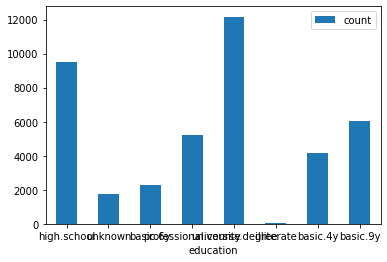

In [ ]:
df_education = my_data_bank.groupby('education').count()


df_education.toPandas().plot(kind='bar', x='education',rot=0)

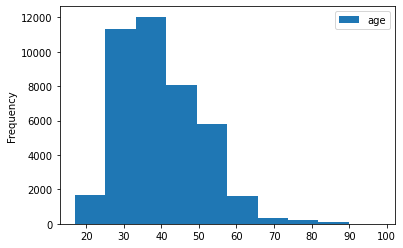

In [ ]:
df_age = my_data_bank.select('age')

df_age.toPandas().plot(kind='hist')